In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn.datasets
from NN_tools import *
from NN_train import *

# Monks Datasets (CLASSIFICATION)

Attribute information:  
* attr1: 1, 2, 3 
* attr2: 1, 2, 3 
* attr3: 1, 2  
* attr4: 1, 2, 3  
* attr5: 1, 2, 3, 4  
* attr6: 1, 2

In [17]:
np.random.seed(1)


#importing monks datasets
path = "input/"

monks1_train = pd.read_csv(path + "monk1_oneofk.train", delimiter = " ", )
monks1_train_y = monks1_train["target"].values
monks1_train_x = monks1_train.drop(["target"],axis = 1).values
monks1_test = pd.read_csv(path + "monk1_oneofk.test", delimiter = " ", )
monks1_test_y = monks1_train["target"].values
monks1_test_x = monks1_train.drop(["target"],axis = 1).values

monks2_train = pd.read_csv(path + "monk2_oneofk.train", delimiter = " ", )
monks2_train_y = monks2_train["target"].values
monks2_train_x = monks2_train.drop(["target"],axis = 1).values
monks2_test = pd.read_csv(path + "monk2_oneofk.test", delimiter = " ", )
monks2_test_y = monks2_train["target"].values
monks2_test_x = monks2_train.drop(["target"],axis = 1).values

monks3_train = pd.read_csv(path + "monk3_oneofk.train", delimiter = " ", )
monks3_train_y = monks3_train["target"].values
monks3_train_x = monks3_train.drop(["target"],axis = 1).values
monks3_test = pd.read_csv(path + "monk3_oneofk.test", delimiter = " ", )
monks3_test_y = monks3_train["target"].values
monks3_test_x = monks3_train.drop(["target"],axis = 1).values

## Monks 1

The target concept associated with the 1st Monk's problem is the binary outcome of the logical formula

MONK-1: (a1 == a2) or (a5 == 1)

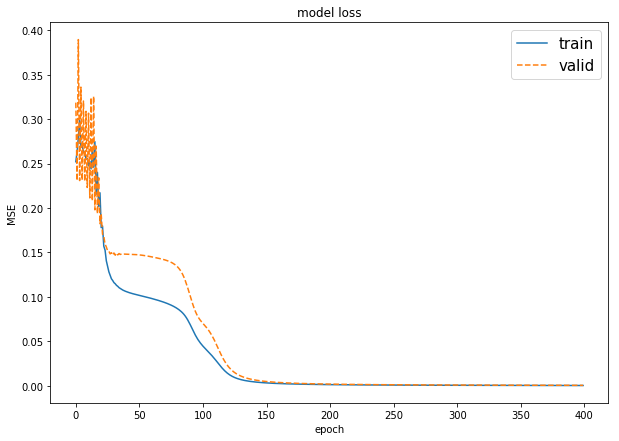

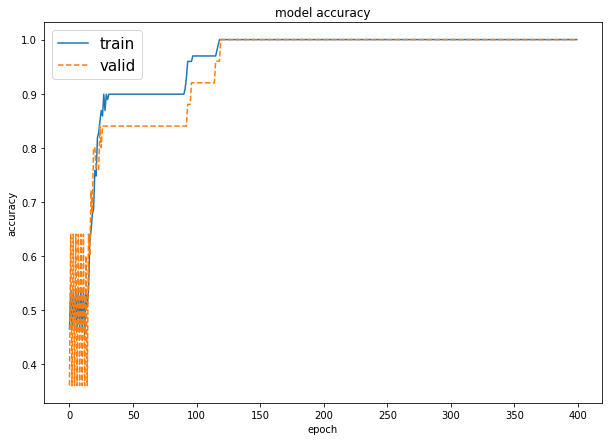

training set MSE 0.0021
training set accuracy: 100.0%
test set MSE 0.4693
test set accuracy: 100.0%


In [19]:
monks1_model= train_model(X=monks1_train_x, y=monks1_train_y, neurons_hidden=3,
                           epochs= 400, momentum_alpha=0.5, lr=0.3, reg_lambda=0.0, validation_split = 0.2)

plot_loss_accuracy(monks1_model)


# training again on the whole training set (tr + vl)
monks1_model = train_model(X=monks1_train_x, y=monks1_train_y, neurons_hidden=3,
                           epochs= 400, momentum_alpha=0.5, lr=0.3, reg_lambda=0.0, validation_split = 0.0)
    
    #### train ####
#MSE e accuracy on the training set (tr + vl)
print("training set MSE %01.4f" % (monks1_model['loss_values_train'][-1]))
print("training set accuracy: %.1f% %" % (monks1_model['accuracy_values_train'][-1] * 100.0))

    #### test ####
#MSE e accuracy on the test set
output_test = predict_values(monks1_model, monks1_test_x)
output_test_binary = [0 if (x<0.5) else 1 for x in output_test]
print("test set MSE %01.4f" % (MSE(y_pred=output_test, y_true=monks1_test_y)))
print("test set accuracy: %.1f% %" % (accuracy_score(y_pred=output_test_binary, y_true=monks1_test_y) * 100.0))

## Monks 2

The target concept associated with the 2nd Monk's problem is the binary outcome of the logical formula: 

MONK-2: EXACTLY TWO of {a1 = 1, a2 = 1, a3 = 1, a4 = 1, a5 = 1, a6 = 1} 

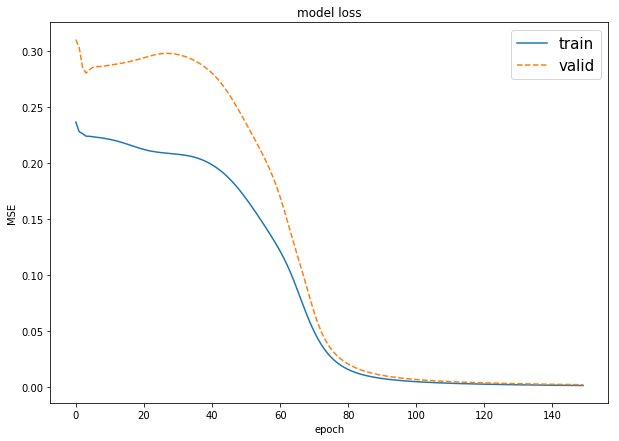

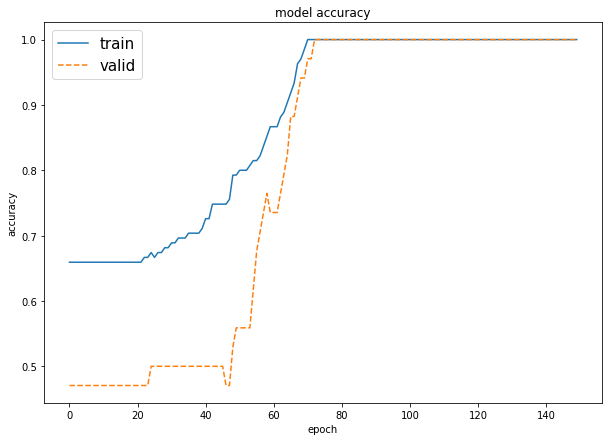

training set MSE 0.0010
training set accuracy: 100.0%
test set MSE 0.4423
test set accuracy: 100.0%


In [21]:
monks2_model = train_model(X=monks2_train_x, y=monks2_train_y, neurons_hidden=4,
                           epochs= 150, momentum_alpha=0.7, lr=0.1, reg_lambda=0.0, validation_split = 0.2)

plot_loss_accuracy(monks2_model)

# training again on the whole training set (tr + vl)
monks2_model = train_model(X=monks2_train_x, y=monks2_train_y, neurons_hidden=4,
                           epochs= 150, momentum_alpha=0.7, lr=0.1, reg_lambda=0.0, validation_split = 0.0)
    
    #### train ####
#MSE e accuracy on the training set (tr + vl)
print("training set MSE %01.4f" % (monks2_model['loss_values_train'][-1]))
print("training set accuracy: %.1f% %" % (monks2_model['accuracy_values_train'][-1] * 100.0))

    #### test ####
#MSE e accuracy on the test set
output_test = predict_values(monks2_model, monks2_test_x)
output_test_binary = [0 if (x<0.5) else 1 for x in output_test]
print("test set MSE %01.4f" % (MSE(y_pred=output_test, y_true=monks2_test_y)))
print("test set accuracy: %.1f% %" % (accuracy_score(y_pred=output_test_binary, y_true=monks2_test_y) * 100.0))

## Monks 3 (reg)

The target concept associated with the 3rd Monk's problem is the binary outcome of the logical formula: 

MONK-3: (a5 = 3 and a4 = 1) or (a5 /= 4 and a2 /= 3) 

In addition, 5% class noise was added to the training set

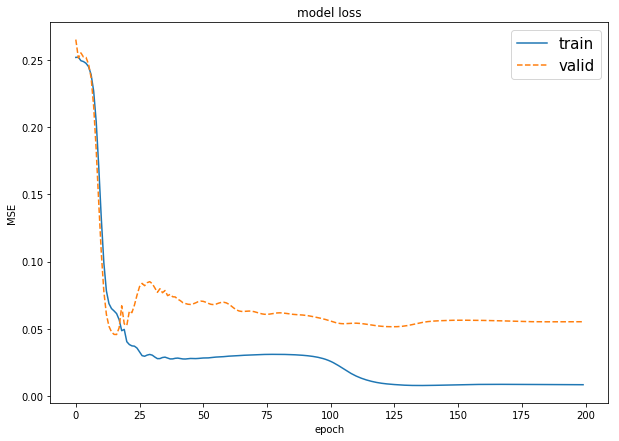

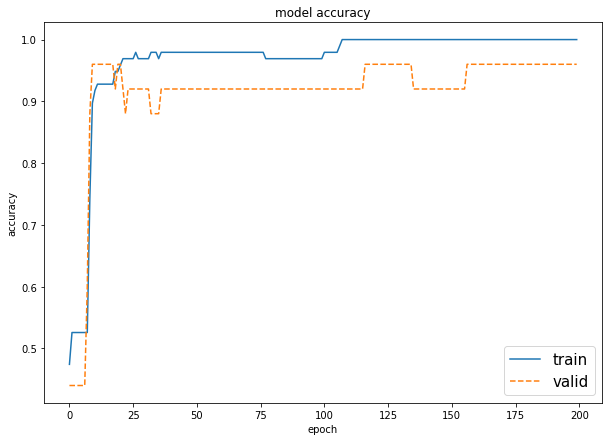

training set MSE 0.0087
training set accuracy: 100.0%
test set MSE 0.4489
test set accuracy: 100.0%


In [24]:
# best with: neurons_hidden=3, epochs=200, momentum_alpha=0.9, lr=0.2, reg_lambda=0.01)
monks3_model = train_model(X=monks3_train_x, y=monks3_train_y, neurons_hidden=3,
                           epochs= 200, momentum_alpha= 0.9, lr=0.2, reg_lambda=0.01, validation_split = 0.2)

plot_loss_accuracy(monks3_model)

# devo prima riallenare il modello su tutto il training set (tr + vl)
monks3_model = train_model(X=monks3_train_x, y=monks3_train_y, neurons_hidden=3,
                           epochs= 200, momentum_alpha=0.9, lr=0.2, reg_lambda=0.01, validation_split = 0.0)
    
    #### train ####
#MSE e accuracy sul training set (tr + vl)
print("training set MSE %01.4f" % (monks3_model['loss_values_train'][-1]))
print("training set accuracy: %.1f% %" % (monks3_model['accuracy_values_train'][-1] * 100.0))

    #### test ####
#MSE e accuracy sul test set
output_test = predict_values(monks3_model, monks3_test_x) #ottengo i risultati del test set
output_test_binary = [0 if (x<0.5) else 1 for x in output_test]
print("test set MSE %01.4f" % (MSE(y_pred=output_test, y_true=monks3_test_y)))
print("test set accuracy: %.1f% %" % (accuracy_score(y_pred=output_test_binary, y_true=monks3_test_y) * 100.0)) #li passo insieme alle etichette



# ML cup     (REGRESSION) #

10 features dataset of continuous values. 2 continuous values target variable.

812 rows training set

204 rows blind test set

In [29]:
from sklearn.model_selection import train_test_split

list_column = list('input' + str(i) for i in range(1,11))
cup_tr = pd.read_csv("input/ML-CUP17-TR.csv", skiprows=9, names= list_column +(['target_x','target_y']))
cup_X = cup_tr.drop(['target_x','target_y'],axis = 1).values
cup_y = cup_tr[['target_x','target_y']].values
cup_tr_X, cup_ts_X, cup_tr_y, cup_ts_y = train_test_split(cup_X, cup_y, test_size=0.2, shuffle=True)

#normalize input
mean, std_dev = np.mean(cup_tr_X,axis=0), np.std(cup_tr_X,axis=0)
cup_tr_X = (cup_tr_X - mean) / std_dev
cup_ts_X = (cup_ts_X - mean) / std_dev


#blind test set
cup_blind_ts = pd.read_csv("input/ML-CUP17-TS.csv", skiprows=9, names= list_column)
cup_blind_ts_X = cup_blind_ts.values
cup_blind_ts_X = (cup_blind_ts_X - mean) / std_dev

TESTBED: first experiments with manual tuning of hyperparams and hold out validation

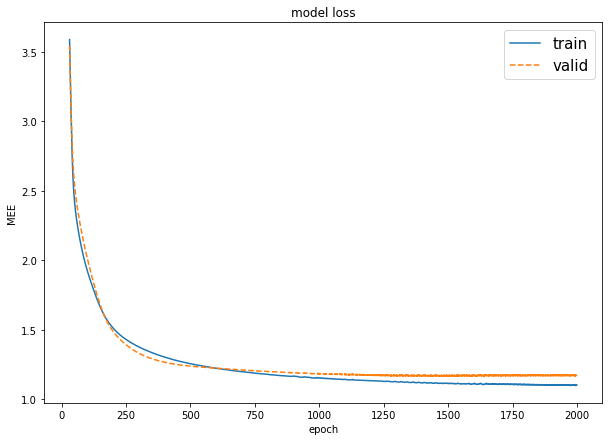

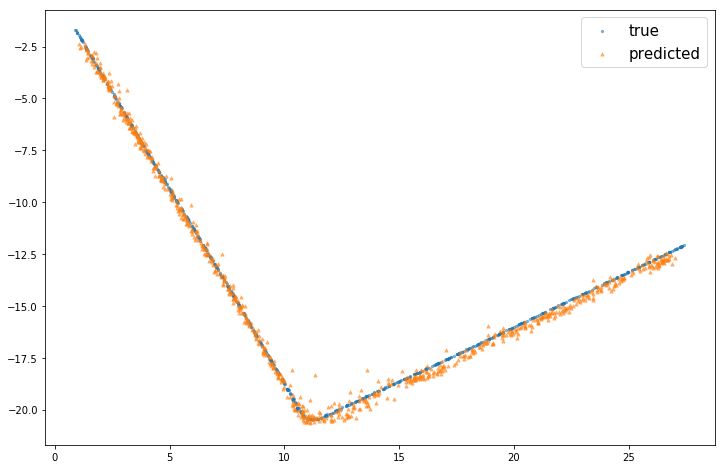

MEE (validation) = 1.1709951415017805


In [30]:
mlcup_model = train_model_regression(cup_tr_X, cup_tr_y, validation_split=0.2 ,lr=0.25, neurons_hidden=16,
                                     momentum_alpha=0.5, epochs=2000, reg_lambda=0.001)
mlcup_predicted = predict_values(model=mlcup_model, X=cup_tr_X, classification= False)
plot_loss_accuracy(model=mlcup_model, print_accuracy=False)
plot_point_cup( mlcup_predicted, cup_tr_y)
print("MEE (validation) =",mlcup_model['loss_values_valid'][-1])

## Grid search & cross validation

In [ ]:
from itertools import product
K_fold = 3
lr_list = [0.1, 0.2, 0.3, 0.4]
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
lambda_list = [0.001, 0.0015, 0.002]

cross_valid_results = []
hyperparams_list = list(product(*[lr_list, alpha_list, lambda_list]))
for hyperparams in hyperparams_list:
    cross_valid_results.append(cross_validation(hyperparams, cup_tr_X, cup_tr_y, K_fold=K_fold))
    print_grid (cross_valid_results[-1])
best_hyperparam_index = np.argmin([x['loss_valid'] for x in cross_valid_results])
print('BEST --->', cross_valid_results[best_hyperparam_index])

In order to plot training and validation set results over the epochs, the mean of every fold of the cross validation is represented here.

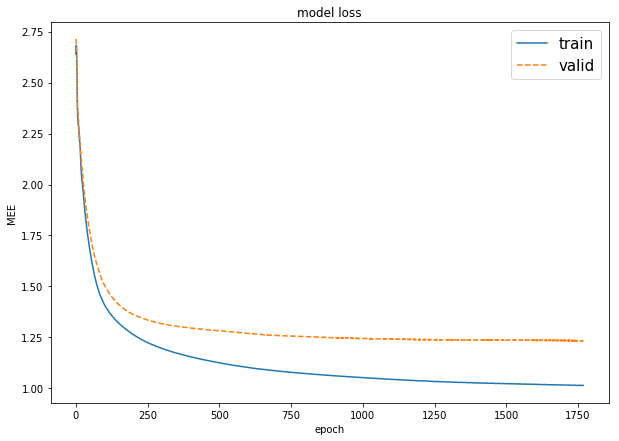

MEE (training) = 1.0152289854045298
MEE (validation) = 1.2359883308925514


In [75]:
models = []
for k in range(1,4):
    X_train, X_valid, y_train, y_valid = split_cross_validation(cup_tr_X,cup_tr_y,k,K_fold)
    models.append(train_model_regression(X_train, y_train, X_valid, y_valid, epochs=1800, validation_split=0.0, 
                                         neurons_hidden=16, lr=0.2, momentum_alpha=0.9, reg_lambda=0.0015))

# per ogni modello ottenuto nella cross validation faccio la media, ad ogni epoca, dei valori di loss ottenuti
loss_train_values_averaged = np.mean(np.array([x['loss_values_train'][31:] for x in models]), axis=0)
loss_valid_values_averaged = np.mean(np.array([x['loss_values_valid'][31:] for x in models]), axis=0)

# Uso un oggetto in cui inserisco la media delle tre liste di valori, per passarlo alla funzione di plot
avg_model_stats = {'loss_values_train': loss_train_values_averaged, 'loss_values_valid': loss_valid_values_averaged}  
plot_loss_accuracy(model= avg_model_stats, print_accuracy=False)
print("MEE (training) =", avg_model_stats['loss_values_train'][-1])
print("MEE (validation) =", avg_model_stats['loss_values_valid'][-1])

## Test

Testing on a portion of the dataset extracted before the training phase, held out for risk estimation.

In [79]:
mlcup_best_model = train_model_regression(cup_tr_X, cup_tr_y, validation_split=0.0 ,lr=0.2, neurons_hidden=16,
                                          momentum_alpha=0.9, epochs=1800, reg_lambda=0.0015)
mlcup_predicted_test = predict_values(model= mlcup_best_model, X=cup_ts_X, classification=False)
print("MEE (test) =", MEE(y_pred=mlcup_predicted_test, y_true=cup_ts_y))

MEE (test) = 1.152182429600762


## BLIND TEST
 
scatter plot of the predicted values over the labels provided in the training set

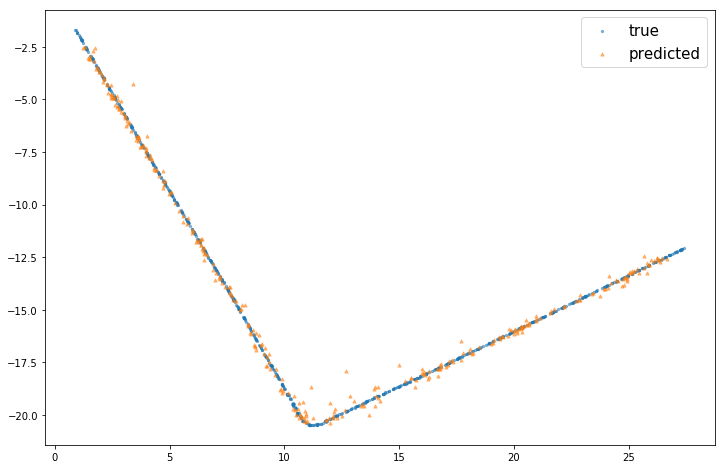

In [78]:
mlcup_model_test = train_model_regression(cup_tr_X, cup_tr_y, validation_split=0.0 ,lr=0.2, neurons_hidden=16,
                                          momentum_alpha=0.9, epochs=1800, reg_lambda=0.0015)
mlcup_predicted_blind_test = predict_values(model=mlcup_model_test, X=cup_blind_ts_X, classification=False)
plot_point_cup(mlcup_predicted_blind_test, cup_tr_y)

In [ ]:
# writing down result to csv
df_results = pd.DataFrame(mlcup_predicted_blind_test, index=list(range(1,len(df_results)+1)))
df_results.to_csv('ML-CUP17-TS.csv', mode='a', header=None)